# WHO national life expectancy analysis and prediction

## About the dataset

## EDA
----
### Basic analysis
- **target feature** : "life_expect" and why not "life_expect60"
- **nb columns/rows** : 32 columns / 3111 rows
- **columns types** : 28 floats, 3 objects/category-like, 1 int ('year' col => may need casting)  
float types cols are mainly rates per n-pop or percentages
- **missing values** : 

### In-depth analysis

## Hypothesis / Intuitions / Ideas
----

### Categorize each feature in an indicator class

I believe that each column can be categorized in indicators :
- Politics : governments actions, funds
- Population Health : vaccination, diseases, hospitals, doctors, alcohol, ...
- Mortality figures
- Social : education, schools, ...
- Countries : columns that identify the concerned country

That doesn't necessarily mean that we should explicitly do a classification work on the dataset. 
But for the analysis, we could identify those indicators and visualize their relations between them and the target.

### Relations between indicators

The general idea would be to observe any correlation inside and between indicators.

1. Check correlations between mortality and the target.
2. Check correlations between pop health and the target.
3. Check correlations between mortality and pop health indicators first, then others indicators.
4. Check correlations between pop health and evey other indicators.

**Hypothesis** : "Population health explains significantly mortality rates and thus gives a good idea of a country's life expectancy".
In other words, check if a good pop health means a high life expectancy with low mortality. Can it be concluded from the previous checkings ?

- Associated columns : ...
- Visualize the evolution of the target with the evolution of pop health over the years
- Polio is mainly an infantile disease (< 5y olds) : check correlation between infantile death rate and polio vaccination rate
- Do the same for every other diseases in the dataset

### Comparing coutries
- Plot maps with different indicators as the hue.
- Profile coutries from their global pop health.

## Librairies

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Import dataset

In [3]:
df = pd.read_csv('who_life_exp.csv')
df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Shape analysis

In [6]:
df.shape

(3111, 32)

In [54]:
df.dtypes

country             object
country_code        object
region              object
year                 int64
life_expect        float64
life_exp60         float64
adult_mortality    float64
infant_mort        float64
age1-4mort         float64
alcohol            float64
bmi                float64
age5-19thinness    float64
age5-19obesity     float64
hepatitis          float64
measles            float64
polio              float64
diphtheria         float64
basic_water        float64
doctors            float64
hospitals          float64
gni_capita         float64
gghe-d             float64
che_gdp            float64
une_pop            float64
une_infant         float64
une_life           float64
une_hiv            float64
une_gni            float64
une_poverty        float64
une_edu_spend      float64
une_literacy       float64
une_school         float64
dtype: object

float64    28
object      3
int64       1
dtype: int64


<AxesSubplot:>

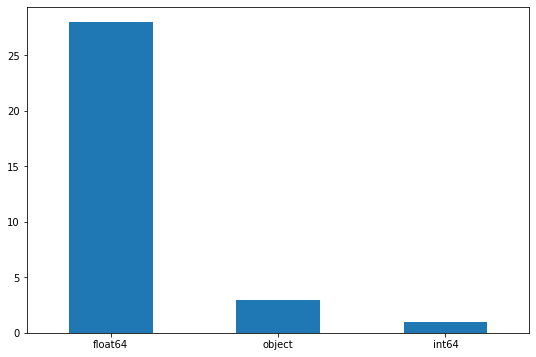

In [35]:
df_dtypes = df.dtypes.value_counts()
print(df_dtypes)
plt.figure(figsize=(9, 6))
df_dtypes.plot.bar(rot=0)

### Missing values

In [50]:
per_missing = df.isna().sum() / df.shape[0]
per_missing.sort_values(ascending=False)

hospitals          0.958213
une_literacy       0.816458
une_school         0.741241
une_poverty        0.706525
doctors            0.427837
une_edu_spend      0.413372
une_hiv            0.238187
gni_capita         0.219222
hepatitis          0.182899
une_gni            0.037608
che_gdp            0.037608
gghe-d             0.032144
alcohol            0.016072
une_pop            0.011893
age5-19obesity     0.010929
age5-19thinness    0.010929
bmi                0.010929
basic_water        0.010286
diphtheria         0.006107
polio              0.006107
measles            0.006107
country_code       0.000000
age1-4mort         0.000000
infant_mort        0.000000
une_infant         0.000000
une_life           0.000000
adult_mortality    0.000000
life_exp60         0.000000
life_expect        0.000000
year               0.000000
region             0.000000
country            0.000000
dtype: float64

<AxesSubplot:>

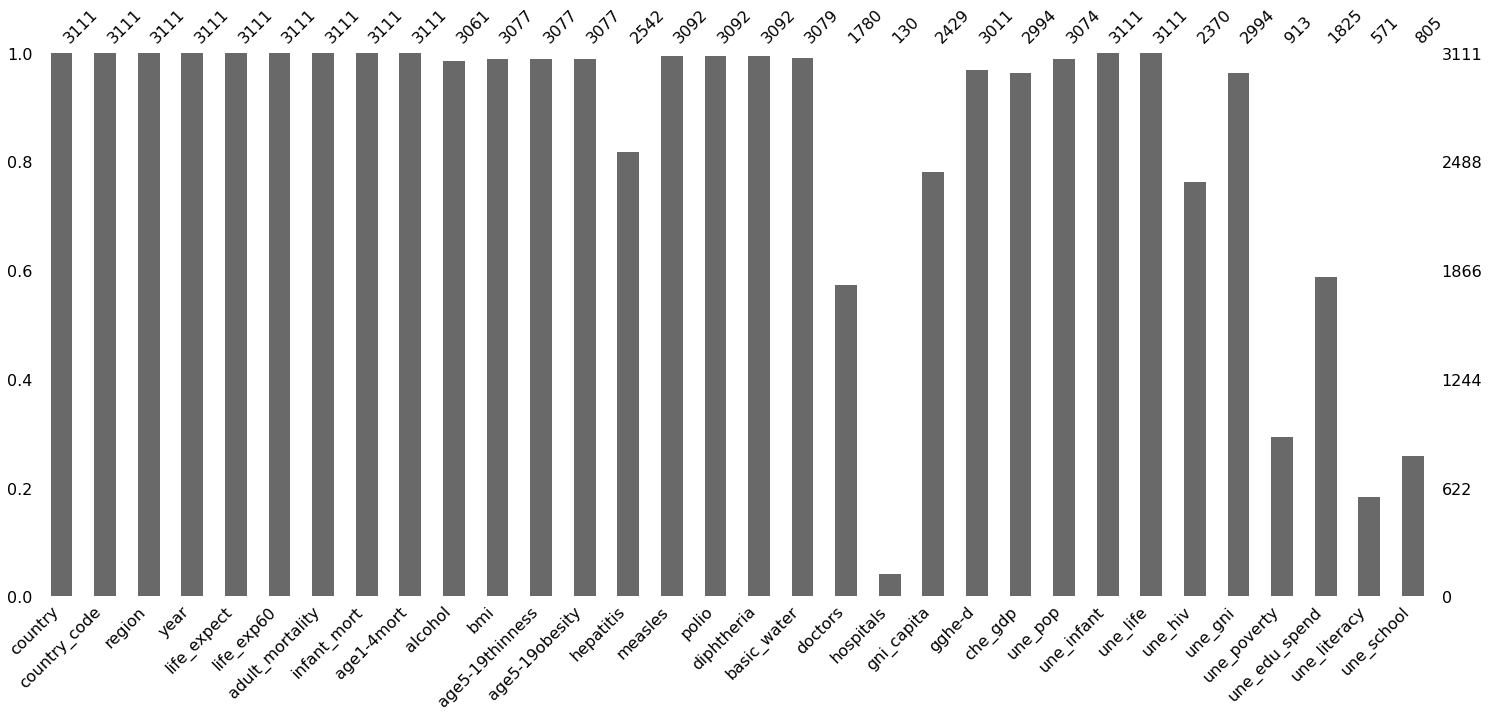

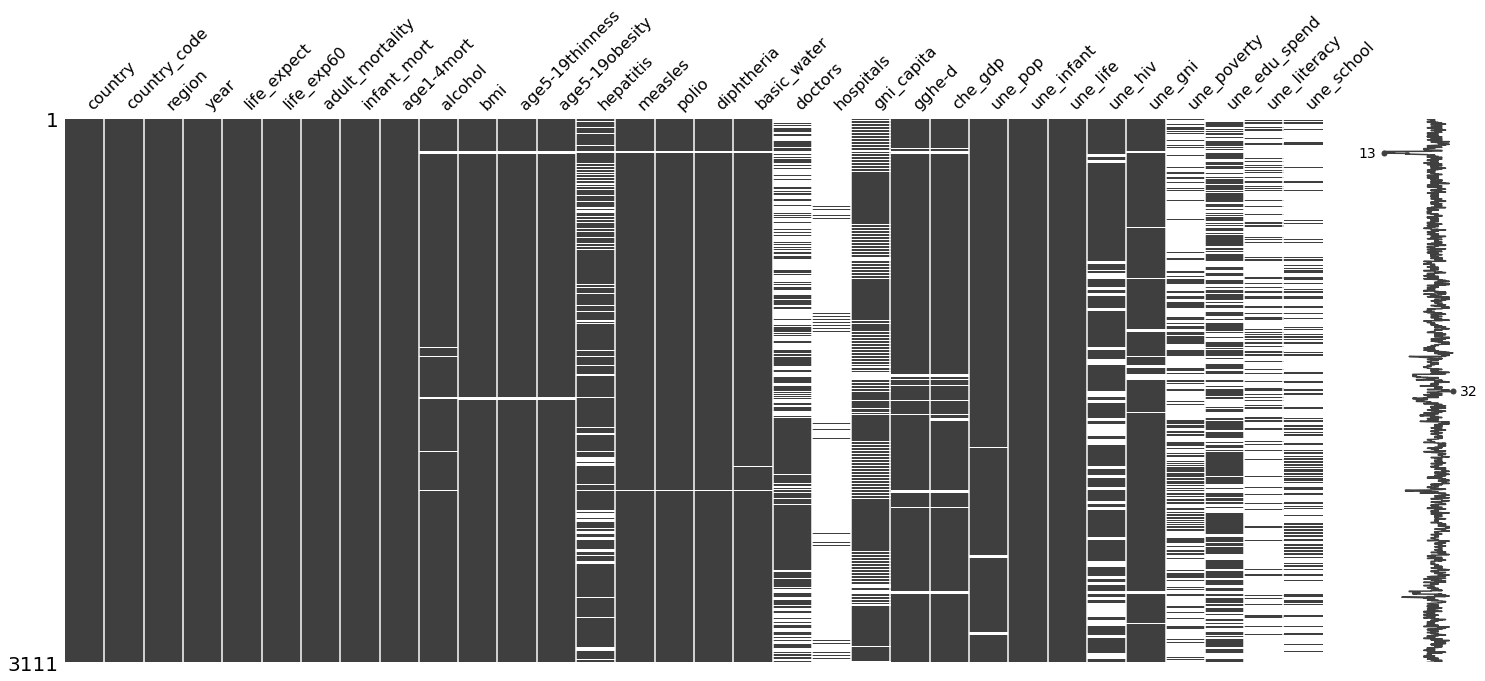

In [52]:
msno.bar(df)
msno.matrix(df)

<AxesSubplot:>

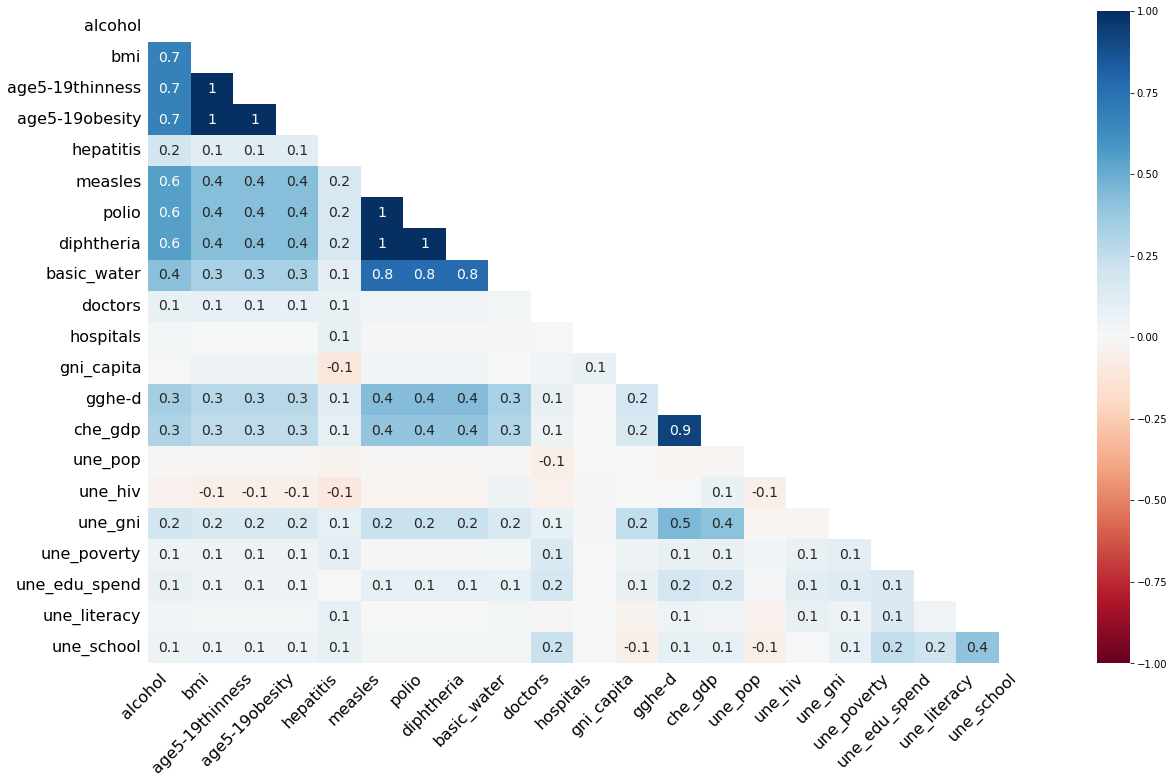

In [45]:
msno.heatmap(df)